# Problem Set #1

**Computational Mathematics (ΥΦΥ101)**

Implemented by: **Anastasios-Faidon Retselis (AEM: 4394)**

# Exercise 1

## Problem Statement:

Find the root to the following equations:

$$
\begin{split}
(a) &\;\; e^{x} - 2x\cos(x)-3=0, \; x\in (0,2) \\
(b) &\;\; x^{2} + \sin(x)+e^{x}-2=0, \; x\in (0,1)
\end{split}
$$

using the methods of bisection and Newton-Raphson. Compare the methods by computing the number of iterations needed to achieve accuracy of 5 significant digits.

Let us first import the necessary packages to solve this exercise using Python:

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Solution for (a)

$$
\begin{split}
(a) &\;\; e^{x} - 2x\cos(x)-3=0, \; x\in (0,2)
\end{split}
$$

Let's first examine the bi-section method. We are interested in also documenting the number of iterations required to achieve an accuracy of 5 significant digits. We will therefore use the **Scarborough criterion**, computing it in the beginning of our code and then calculating the approximate error of each iteration. We will meet the criterion once the approximater error is below the error given by the Scarborough formula.

In [2]:
# Bi-section method

x_lower = 0
x_upper = 2
n = 5 # Number of significant digits to be computed
es = 0.5*pow(10, (2-n))
ea = 100
repetitions = 0
value_prev = 100

bisec_iter_list = []
bisec_value_list = []

f = lambda x : math.exp(x)-(2*x*math.cos(x))-3

while ea>es:
    xr = (x_lower+x_upper)/2
    repetitions = repetitions + 1
    if f(x_lower)*f(xr)<0:
        x_upper = xr
        value = xr
    elif f(x_upper)*f(xr)<0:
        x_lower = xr
        value = xr
    ea = math.fabs((value-value_prev)*100/value)
    value_prev = xr
    bisec_iter_list.append(repetitions)
    bisec_value_list.append(xr)
    
print('Root found (after %d iterations)! x_root = %.5f' % (repetitions, xr))

Root found (after 19 iterations)! x_root = 1.30463


We can also plot the results to see how the method approaches the desired accuracy:

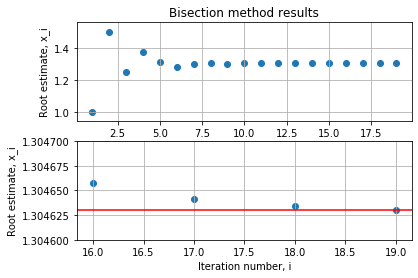

In [3]:
# Plot bisection method results

plt.subplot(2,1,1)
plt.title('Bisection method results')
plt.scatter(bisec_iter_list,bisec_value_list)
axes = plt.gca()
axes.set_ylabel('Root estimate, x_i')
plt.grid()
plt.subplot(2,1,2)
plt.scatter(bisec_iter_list[-4:],bisec_value_list[-4:])
plt.axhline(y=1.30463,color='r')
axes = plt.gca()
axes.set_ylim([1.3046,1.3047])
axes.set_ylabel('Root estimate, x_i')
axes.set_xlabel('Iteration number, i')
axes.ticklabel_format(useOffset=False)
plt.grid()


Let's now examine the Newton-Raphson Method. We will again use the **Scarborough criterion** as the stopping condition, computing it in the beginning of our code and then calculating the approximate error of each iteration. We will stop the calculation once the approximate error is below the error given by the Scarborough formula. For the Newton-Raphson Method, we also have to calculate the derivative of the function. Let's assume:

$$
\begin{split}
&f(x)=e^{x} - 2x\cos(x)-3 \\
\end{split}
$$

the derivative of $f(x)$ is:

$$
\begin{split}
&f'(x)=e^{x} - 2x\cos(x)+2x\sin(x) \\
\end{split}
$$

In [4]:
# Newton-Raphson method

x0 = 1
n = 5 # Number of significant digits to be computed
es = 0.5*pow(10, (2-n))
ea = 100
repetitions = 0
x_prev = x0

newton_iter_list = []
newton_value_list = []

f = lambda x : math.exp(x)-(2*x*math.cos(x))-3
fdot = lambda x : math.exp(x)+2*(x*math.sin(x)-math.cos(x))

while ea>es:
    x_next = x_prev - (f(x_prev)/fdot(x_prev))
    ea = math.fabs((x_next-x_prev)*100/x_next)
    repetitions = repetitions + 1
    x_prev = x_next
    newton_iter_list.append(repetitions)
    newton_value_list.append(x_next)
    
print('Root found (after %d iterations)! x_root = %.5f' % (repetitions, x_next))

Root found (after 5 iterations)! x_root = 1.30463


Let's again plot the results to see how the method approaches the desired accuracy:

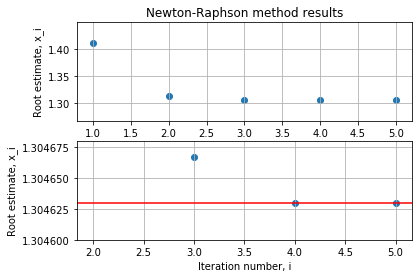

In [5]:
# Plot Newton-Raphson method results

plt.subplot(2,1,1)
plt.title('Newton-Raphson method results')
plt.scatter(newton_iter_list,newton_value_list)
axes = plt.gca()
axes.set_ylabel('Root estimate, x_i')
plt.grid()
plt.subplot(2,1,2)
plt.scatter(newton_iter_list[-4:],newton_value_list[-4:])
plt.axhline(y=1.30463,color='r')
axes = plt.gca()
axes.set_ylim([1.3046,1.30468])
axes.set_ylabel('Root estimate, x_i')
axes.set_xlabel('Iteration number, i')
axes.ticklabel_format(useOffset=False)
plt.grid()

Looking at the results we can assume that the Newton-Raphson Method performs better the bisection method used above. However, let's not forget that we used assumed a value of $x_{0}=1$ for the Newton-Raphson method, while we used the entire interval values $x_{lower}=0$ and $x_{upper}=2$ for the bisection method. It would be interesting to see if there are worse case scenarios for the Newton-Raphson method, for which we wouuld have to perform more iterations.

We can re-run the Newton-Raphson method starting from $x_{0}=1$ moving up towards to $x_{0}=2$ with a step of $step=0.1$. For each step we will ask for the number of iterations to achieve the requested accuracy, in order to ultimately obtain the maximum possible number of iterations for this scenario. We will also provide the minimum amount of iterations needed (although this is not a "fair" comparison).

In [6]:
# Newton-Raphson method (step increasing - max/min_iterations finder)

x_lower = 0
x_upper = 2
step_size = 0.1
max_iterations = 0
min_iterations = 100
n = 5 # Number of significant digits to be computed
es = 0.5*pow(10, (2-n))

f = lambda x : math.exp(x)-(2*x*math.cos(x))-3
fdot = lambda x : math.exp(x)+2*(x*math.sin(x)-math.cos(x))

for i in np.arange(x_lower, x_upper, step_size):
    repetitions = 0
    x_prev = i
    ea = 100
    while ea>es:
        repetitions = repetitions + 1
        x_next = x_prev - (f(x_prev)/fdot(x_prev))
        ea = math.fabs((x_next-x_prev)*100/x_next)
        x_prev = x_next
    if repetitions > max_iterations:
        max_iterations = repetitions
        max_iterations_initial = i
    elif repetitions < min_iterations:
        min_iterations = repetitions
        min_iterations_initial = i
        
print('Max iterations needed to find root is for initial value x_0 = %.2f (%d iterations)!' % (max_iterations_initial, max_iterations))
print('Min iterations needed to find root is for initial value x_0 = %.2f (%d iterations)!' % (min_iterations_initial, min_iterations))

Max iterations needed to find root is for initial value x_0 = 0.00 (14 iterations)!
Min iterations needed to find root is for initial value x_0 = 1.30 (3 iterations)!


Based on this result it is evident that for this specific example, the **Newton-Raphson** method outperforms the bi-section method, with the worst case scenario requiring 4 less iterations than the bisection method to achieve the requested accuracy. 

## Solution for (b)

$$
\begin{split}
(b) &\;\; x^{2} + \sin(x)+e^{x}-2=0, \; x\in (0,1)
\end{split}
$$

In a similar manner, let's begin with the bisection method and plot the results:

In [7]:
# Bi-section method

x_lower = 0
x_upper = 1
n = 5 # Number of significant digits to be computed
es = 0.5*pow(10, (2-n))
ea = 100
repetitions = 0
value_prev = 100

f = lambda x : pow(x,2)+math.sin(x)+math.exp(x)-2

while ea>es:
    xr = (x_lower+x_upper)/2
    repetitions = repetitions + 1
    if f(x_lower)*f(xr)<0:
        x_upper = xr
        value = xr
    elif f(x_upper)*f(xr)<0:
        x_lower = xr
        value = xr
    ea = math.fabs((value-value_prev)*100/value)
    value_prev = xr
    
print('Root found (after %d iterations)! x_root = %.5f' % (repetitions, xr))

Root found (after 19 iterations)! x_root = 0.38708


To use the Newton-Raphson method, we have again to calculate the derivative. Let's assume:

$$
\begin{split}
f(x)=x^{2}+ \sin(x) + e^{x} -2
\end{split}
$$

then the derivative of $f(x)$ is:

$$
\begin{split}
f'(x)=2x+\cos(x)+e^{x}
\end{split}
$$

And let's also assume that we start from the middle of the interval $(0,1)$, and therefore we have $x_{0}=0.5$. To make the comparison "fair" again, we will also determine maximum possible amount of iterations needed if we start from any value inside $(0,1)$ with a $step=0.1$.

In [8]:
# Newton-Raphson method

x0 = 0.5
n = 5 # Number of significant digits to be computed
es = 0.5*pow(10, (2-n))
ea = 100
repetitions = 0
x_prev = x0

f = lambda x : pow(x,2)+math.sin(x)+math.exp(x)-2
fdot = lambda x : (2*x)+math.cos(x)+math.exp(x)

while ea>es:
    x_next = x_prev - (f(x_prev)/fdot(x_prev))
    ea = math.fabs((x_next-x_prev)*100/x_next)
    repetitions = repetitions + 1
    x_prev = x_next
    
print('Root found (after %d iterations)! x_root = %.5f' % (repetitions, x_next))

Root found (after 4 iterations)! x_root = 0.38708


In [9]:
# Newton-Raphson method (step increasing - max/min_iterations finder)

x_lower = 0
x_upper = 2
step_size = 0.1
max_iterations = 0
min_iterations = 100
n = 5 # Number of significant digits to be computed
es = 0.5*pow(10, (2-n))

f = lambda x : pow(x,2)+math.sin(x)+math.exp(x)-2
fdot = lambda x : (2*x)+math.cos(x)+math.exp(x)

for i in np.arange(x_lower, x_upper, step_size):
    repetitions = 0
    x_prev = i
    ea = 100
    while ea>es:
        repetitions = repetitions + 1
        x_next = x_prev - (f(x_prev)/fdot(x_prev))
        ea = math.fabs((x_next-x_prev)*100/x_next)
        x_prev = x_next
    if repetitions > max_iterations:
        max_iterations = repetitions
        max_iterations_initial = i
    elif repetitions < min_iterations:
        min_iterations = repetitions
        min_iterations_initial = i
        
print('Max iterations needed to find root is for initial value x_0 = %.2f (%d iterations)!' % (max_iterations_initial, max_iterations))
print('Min iterations needed to find root is for initial value x_0 = %.2f (%d iterations)!' % (min_iterations_initial, min_iterations))

Max iterations needed to find root is for initial value x_0 = 1.70 (6 iterations)!
Min iterations needed to find root is for initial value x_0 = 0.40 (3 iterations)!


## Conclusion

For both functions used in (a) and (b), we can clearly see that the Newton-Raphson method outperforms the bisection method.


# Exercise 2

## Problem Statement

Find the root to the following equation, using the $x=g(x)$ method (carefully select the $x=g(x)$ format that converges):

$$
\begin{split}
2e^{x}-3x^{2}=0, \;x\in[-1,1]
\end{split}
$$

Also use Newton-Raphson and compare the results of the two methods.

## Solution using the $x=g(x)$ method

Let us first examine the simple fixed point iteration method or $x=g(x)$ method. We first have to bring the original $f(x)=0$ equation in the $x=g(x)$ form. By rearranging the equation, we obtain

$$
\begin{split}
& 2e^{x}-3x^{2}=0\\
\Rightarrow & 2e^{x}=3x^{2}\\
\Rightarrow & \frac{2e^{x}}{3}=x^{2}\\
\Rightarrow & x=\pm\sqrt{\frac{2e^{x}}{3}}
\end{split}
$$

which is in the desired $x=g(x)$ format. Before beginning the actual calculation, let's determine if the plus or minus sign will converge by plotting $y(x)=x$ and $g(x)=\pm\sqrt{\frac{2e^{x}}{3}}$, and also checking the derivative for the correct function.

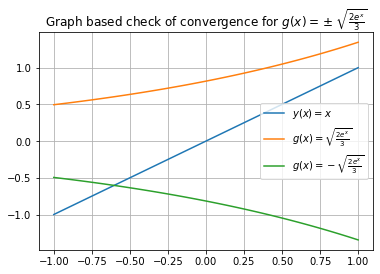

In [10]:
# Plot the selected g(x) to see if it converges

x = np.linspace(-1,1,100)
y = x
g1 = np.sqrt((2*np.exp(x))/3)
g2 = -np.sqrt((2*np.exp(x))/3)

plt.figure()
plt.plot(x,y,label=r'$y(x)=x$')
plt.plot(x,g1,label=r'$g(x)=\sqrt{\frac{2e^{x}}{3}}$')
plt.plot(x,g2,label=r'$g(x)=-\sqrt{\frac{2e^{x}}{3}}$')
plt.title(r'Graph based check of convergence for $g(x)=\pm\sqrt{\frac{2e^{x}}{3}}$')
plt.legend()
plt.grid()

Based on the figure above, we can conclude that the solution exists for $g(x)=-\sqrt{\frac{2e^{x}}{3}}$. Let's also prove the convergence by checking the derivative of $g(x)$:

$$
\begin{split}
& g'(x)=(-\sqrt{\frac{2e^{x}}{3}})'\\
\Rightarrow & g'(x)=-\sqrt{\frac{2}{3}}(\sqrt{e^{x}})'\\
\Rightarrow & g'(x)=-\sqrt{\frac{2}{3}}\frac{e^{x}}{2\sqrt{e^{x}}}\\
\Rightarrow & g'(x)=-\sqrt{\frac{e^{x}}{6}}
\end{split}
$$

Let's now plot $|g'(x)|$ to determine if the $x=g(x)$ method will converge:

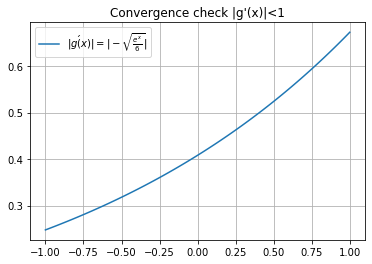

In [11]:
# Plot g'(x) to determine if |g'x|<1

x = np.linspace(-1,1,100)
y = x
gdot = np.abs(-np.sqrt(np.exp(x)/6))

plt.figure()
plt.plot(x,gdot,label=r'$|g\'(x)|=|-\sqrt{\frac{e^{x}}{6}}|$')
plt.title('Convergence check |g\'(x)|<1')
plt.legend()
plt.grid()

We can indeed observe that for the entire interval $x\in[-1,1]$ the inequality $|g'(x)|<1$ holds true. We can proceed with finding the root using the simple fixed-point iteration method, computing the approximate error in each step and comparing it to a predetermined Scarborough criterion in order to use it as a stopping condition.

In [12]:
# Simple fixed-point iteration or x=g(x) method

x0 = -0.5
max_iterations = 200
n = 5 # Number of significant digits to be computed
es = 0.5*pow(10, (2-n))
ea = 100
g = lambda x : -np.sqrt(2*np.exp(x)/3)

xr = x0
iterations = 0

while ea>=es:
    xr_old = xr
    xr = g(xr_old)
    iterations += 1
    if xr != 0:
        ea = math.fabs((xr-xr_old)*100/xr)
    if iterations >= max_iterations:
        break
    #print('xr=%.5f xr_old=%.5f ea=%.5f es=%.5f' % (xr,xr_old,ea,es))

print('x=g(x) method:')
if iterations < max_iterations:
    print('Root found (after %d iterations)! x_root = %.5f' % (iterations, xr))
else:
    print('Max iterations reached without solution!')

x=g(x) method:
Root found (after 10 iterations)! x_root = -0.60374


## Solution using the Newton-Raphson Method

Let us now compare the $x=g(x)$ method to the Newton-Raphson Method. To solve $2e^{x}-3x^{2}=0$, let's assume:

$$
\begin{split}
f(x)&=2e^{x}-3x^{2}, \;x\in[-1,1]\\
f'(x)&=2e^{x}-6x
\end{split}
$$

In [13]:
# Newton-Raphson method

f = lambda x : 2*np.exp(x)-3*pow(x,2)
fdot = lambda x : 2*np.exp(x)-6*x

x0 = -0.5
max_iterations = 200
n = 5 # Number of significant digits to be computed
es = 0.5*pow(10, (2-n))
ea = 100

xr = x0
iterations = 0

while ea>es:
    xr_old = xr
    xr = xr_old - (f(xr_old)/fdot(xr_old))
    iterations += 1
    if xr != 0:
        ea = math.fabs((xr-xr_old)*100/xr)
    if iterations >= max_iterations:
        break

print('Newton-Raphson Method:')
if iterations < max_iterations:
    print('Root found (after %d iterations)! x_root = %.5f' % (iterations, xr))
else:
    print('Max iterations reached without solution!')

Newton-Raphson Method:
Root found (after 4 iterations)! x_root = -0.60374


## Conclusion

Using exactly the same initial guess for both methods, we notice that the Newton-Raphson method outperforms the $x=g(x)$ method. This happens because the error of each iteration is approximately the square of the previous iteration error.

# Exercise 3

## Problem Statement

Find the Lagrange polynomials that have the same values as the given functions, at the points specified:

$$
\begin{split}
y(x)=1+sin(\pi x),\;&for\;x=-1,0\;and\;1\\
f(x)=\frac{1}{1+x^{2}},\;&for\;x=-5,-4,-3,...,3,4,5
\end{split}
$$

Plot your results for comparison.

## Solution for $y(x)$

For any given set of n data points, we can get a Langrange polynomial of n-1th order. Therefore, since we have 3 data sets based on $y(x)$ we can determine that our Lagrange polynomial will be a 2nd order polynomial. Let's now calculate it:

The Lagrange interpolating polynomial is:
1.0*x*(x/2 + 1/2) + 0.5*x*(x - 1) - 1.0*(x - 1)*(x + 1)

Simplifying the Lagrange interpolating polynomial...
1.66533453693773e-16*x + 1.0


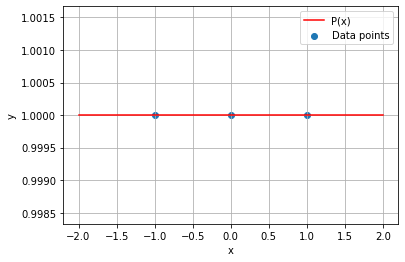

In [14]:
import sympy
import numpy as np

x = sympy.symbols('x')

data_x = np.array([-1,0,1])
data_y = 1+np.sin(data_x*np.pi)
P = 0

# Calculate the Lagrange interpolating polynomial
for i in range(len(data_x)):
    L = 1
    for j in range(len(data_x)):
        if i!=j:
            L = L * (x-data_x[j])/(data_x[i]-data_x[j])
    P += L*data_y[i]
print('The Lagrange interpolating polynomial is:')
print(P)
print('\nSimplifying the Lagrange interpolating polynomial...')
print(sympy.simplify(P))

# Plot with matplotlib instead of sympy.plot to also add scatter points
# Create a np.linspace and plot the function there
lam_P = sympy.lambdify(x,P,modules=['numpy'])
x_plot = np.linspace(-2,2,100)
y_plot = lam_P(x_plot)

plt.plot(x_plot,y_plot,color='red',label='P(x)')
plt.scatter(data_x,data_y,label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

We see that the terms cancel each other out and we therefore end up with a linear solution for the three datapoints.

## Solution for $f(x)$

For the given $f(x)$, since we have 11 data sets, we can determine that our Lagrange polynomial will be a 10th order polynomial. Let's now calculate it:

The Lagrange interpolating polynomial is:
-2.26244343891403e-5*x**10 - 1.6940658945086e-21*x**9 + 0.00126696832579185*x**8 + 1.0842021724855e-19*x**7 - 0.0244117647058824*x**6 - 1.73472347597681e-18*x**5 + 0.19737556561086*x**4 + 6.93889390390723e-18*x**3 - 0.67420814479638*x**2 - 6.93889390390723e-18*x + 1.0


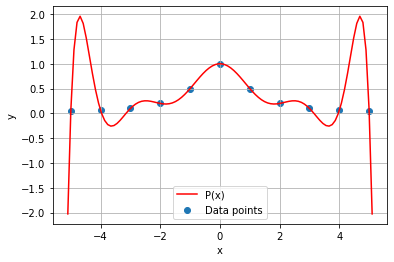

In [15]:
import sympy
import numpy as np

x = sympy.symbols('x')

data_x = np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])
data_y = 1/(1+(data_x*data_x))
P = 0

# Calculate the Lagrange interpolating polynomial
for i in range(len(data_x)):
    L = 1
    for j in range(len(data_x)):
        if i!=j:
            L = L * (x-data_x[j])/(data_x[i]-data_x[j])
    P += L*data_y[i]
print('The Lagrange interpolating polynomial is:')
print(sympy.simplify(P))


# Plot with matplotlib instead of sympy.plot to also add scatter points
# Create a np.linspace and plot the function there
lam_P = sympy.lambdify(x,P,modules=['numpy'])
x_plot = np.linspace(-5.1,5.1,100)
y_plot = lam_P(x_plot)

plt.plot(x_plot,y_plot,color='red',label='P(x)')
plt.scatter(data_x,data_y,label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

## Conclusion

The code used above can be used to calculate any Lagrange Interpolating Polynomial, given an initial set of data.

# Exercise 4

## Problem Statement

Use Newton-Gregory formula to calculate an interpolating polynomial going through the following equidistant points. Plot your result.

|  **x**  |  **f(x)** |
|:---:|:-----:|
| 0.2 | 0.185 |
| 0.3 | 0.106 |
| 0.4 | 0.093 |
| 0.5 |  0.24 |
| 0.6 | 0.579 |
| 0.7 | 0.561 |

Using the Newton-Gregory formula to find polynomial...

The difference table is:
[[ 0.185 -0.079  0.066  0.094 -0.062 -0.519]
 [ 0.106 -0.013  0.16   0.032 -0.581  0.   ]
 [ 0.093  0.147  0.192 -0.549  0.     0.   ]
 [ 0.24   0.339 -0.357  0.     0.     0.   ]
 [ 0.579 -0.018  0.     0.     0.     0.   ]
 [ 0.561  0.     0.     0.     0.     0.   ]]

The interpolating polynomial is:
-432.5*x**5 + 839.166666666667*x**4 - 618.541666666667*x**3 + 221.708333333333*x**2 - 39.5413333333333*x + 2.969


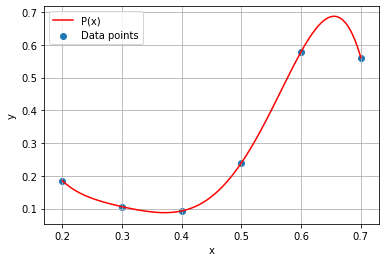

In [16]:
import matplotlib.pyplot as plt
import sympy
import numpy as np
import math

x = sympy.symbols('x')

data_x = np.array([0.2,0.3,0.4,0.5,0.6,0.7])
data_y = np.array([0.185,0.106,0.093,0.24,0.579,0.561])
n = len(data_x)

# Equidistant check
for i in range(0,n-3):
    h = data_x[1] - data_x[0]
    if (h - data_x[i+2] - data_x[i+1] > pow(10,-9)):
        # Condition above is avoiding floating point arithmetic issues
        print('Warning: Input data are not equally spaced!')
        break
s = (x-data_x[0])/h

# Initialize dif_table and add f(x) to first column:
dif_table = np.zeros((n,n))
for i in range(n):
    dif_table[i,0] = data_y[i]

for i in range(1,n):
    for j in range(0,n-i):
        dif_table[j,i] = dif_table[j+1,i-1] - dif_table[j,i-1]

print('Using the Newton-Gregory formula to find polynomial...\n')
print('The difference table is:')
print(dif_table)

# Compute Newton-Gregory polynomial

P = data_y[0]
temp_s = 1
for i in range(n-1):
    temp_s *= (s-i)
    P += dif_table[0,i+1]*temp_s/math.factorial(i+1)

print('\nThe interpolating polynomial is:')
print(sympy.simplify(P))


lam_P = sympy.lambdify(x,P,modules=['numpy'])
x_plot = np.linspace(0.2,0.7,100)
y_plot = lam_P(x_plot)

plt.plot(x_plot,y_plot,color='red',label='P(x)')
plt.scatter(data_x,data_y,label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()